In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [5]:
player_data <- read_csv("https://raw.githubusercontent.com/angusesgus/Individual-planning-report/refs/heads/main/players.csv")
glimpse(player_data)
summary(player_data)
session_data <- read_csv("https://raw.githubusercontent.com/angusesgus/Individual-planning-report/refs/heads/main/sessions.csv")
glimpse(session_data)
summary(session_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…


 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

(1) Data Description:
    
    Dataset 1 has 196 observations and 7 variables, while dataset 2 has 1535 observations with 5 variables.
Dataset 1:
| Variable Name   | Type      | Description                                      | Issues         |
|-----------------|-----------|--------------------------------------------------|----------------|
| experience      | chr       | Experience of each player                        | Not factor     |
| subscribe       | lgl       | Whether the player subscribed to the newsletter  | None           |
| hashedEmail     | chr       | Hashed email of player                           | None           |
| played_hours    | numeric   | Total playtime across all sessions (hours)       | None           |
| name            | chr       | Player first name                                | None           |
| gender          | chr       | Player gender                                    | Not factor     |
| age             | numeric   | Age of the player in years                       | None           |

Dataset 2:

| Variable Name       | Type      | Description                                      | Issues                          |
|---------------------|-----------|--------------------------------------------------|---------------------------------|
| hashedEmail         | chr       | Hasehd email of each player                      | None                            |
| start_time          | chr       | Time play session begins                         | None                            |
| end_time            | chr       | Time play session ends                           | None                            |
| original_start_time | numeric   | Start time in unix time                          | Not accurate enough to be useful|
| original_end_time   | numeric   | End time in unix time                            | Not accurate enough to be useful|

Summary statistics
Mean age: 21.14
Mean hours played: 5.846

(2) Questions:

Broad question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Specific question: Can experience, gender, and age predict whether a player subscribes or not in the player dataset?

I will use the data from dataset 1 in the experience, gender, and age colomns to predict whether the observations in the subscription colomn will be true or false.
Possible wrangling I would do is to change experience and gender into factors, so that I can compute these values in categories.

(3) Exploratory Data Analysis and Visualization

In [10]:
slice(player_data, 1:10)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


There is not much wrangling to tidy data here, as each colomn has one variable, each row has one observation, and each cell has one value. 
However, it is necessary to change experience and gender into factors so that a visualization can be made.

In [14]:
player_data <- player_data |>
    mutate(across(c(experience, gender), as.factor))
slice(player_data, 1:10)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [34]:
mean_data <- player_data |>
    summarize(across(c(played_hours, Age), mean, na.rm = TRUE))
mean_data

played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


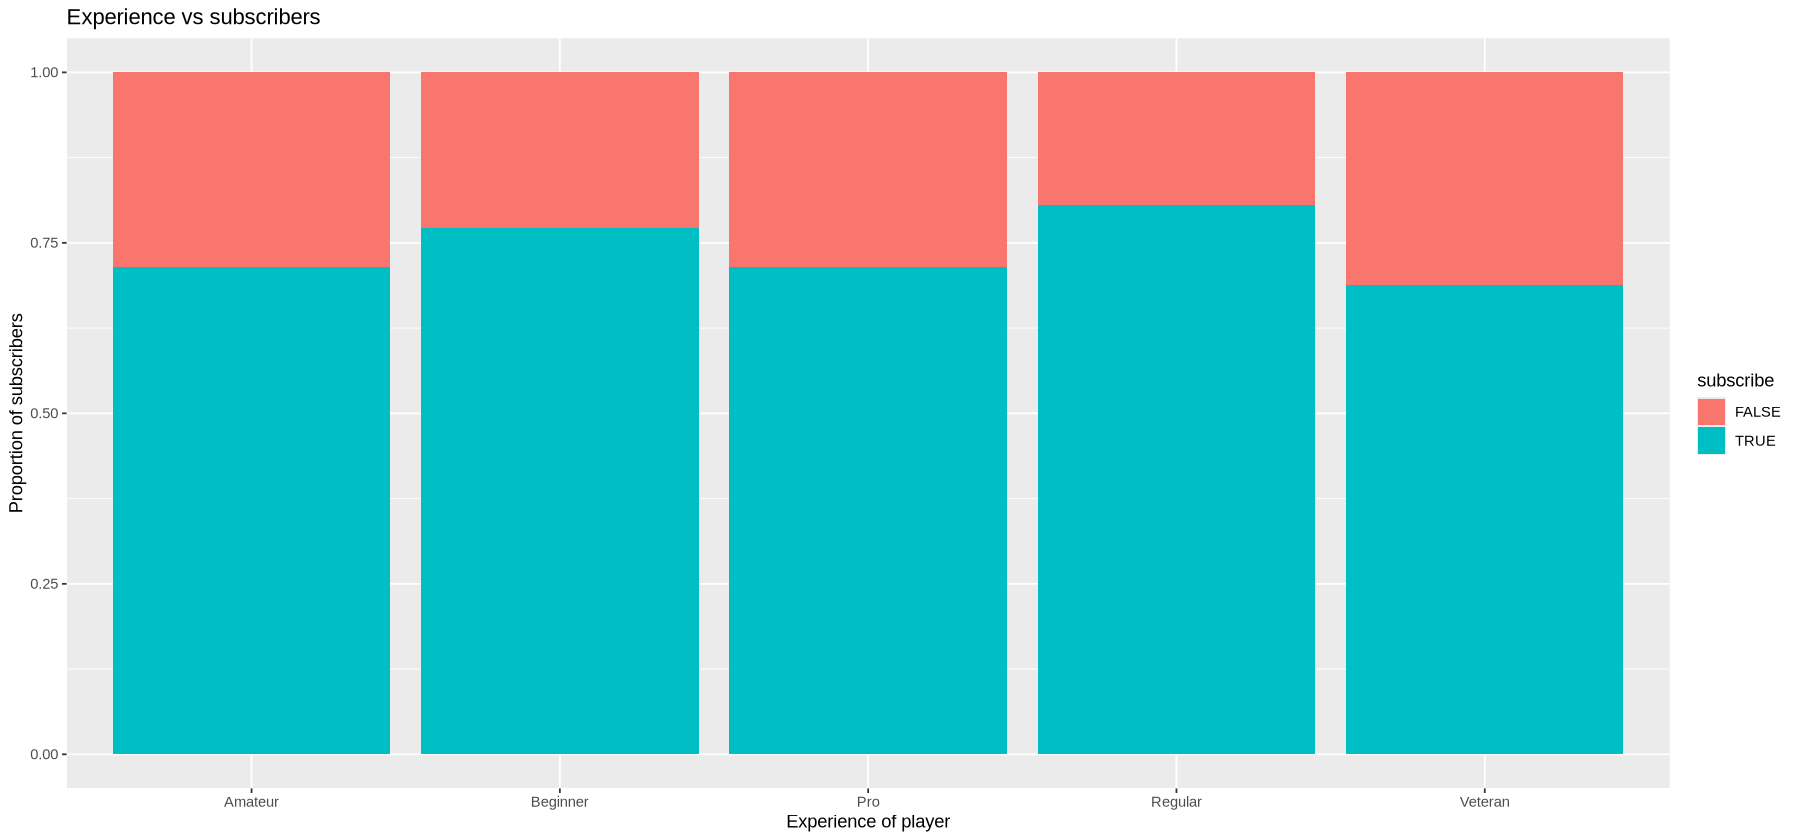

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”


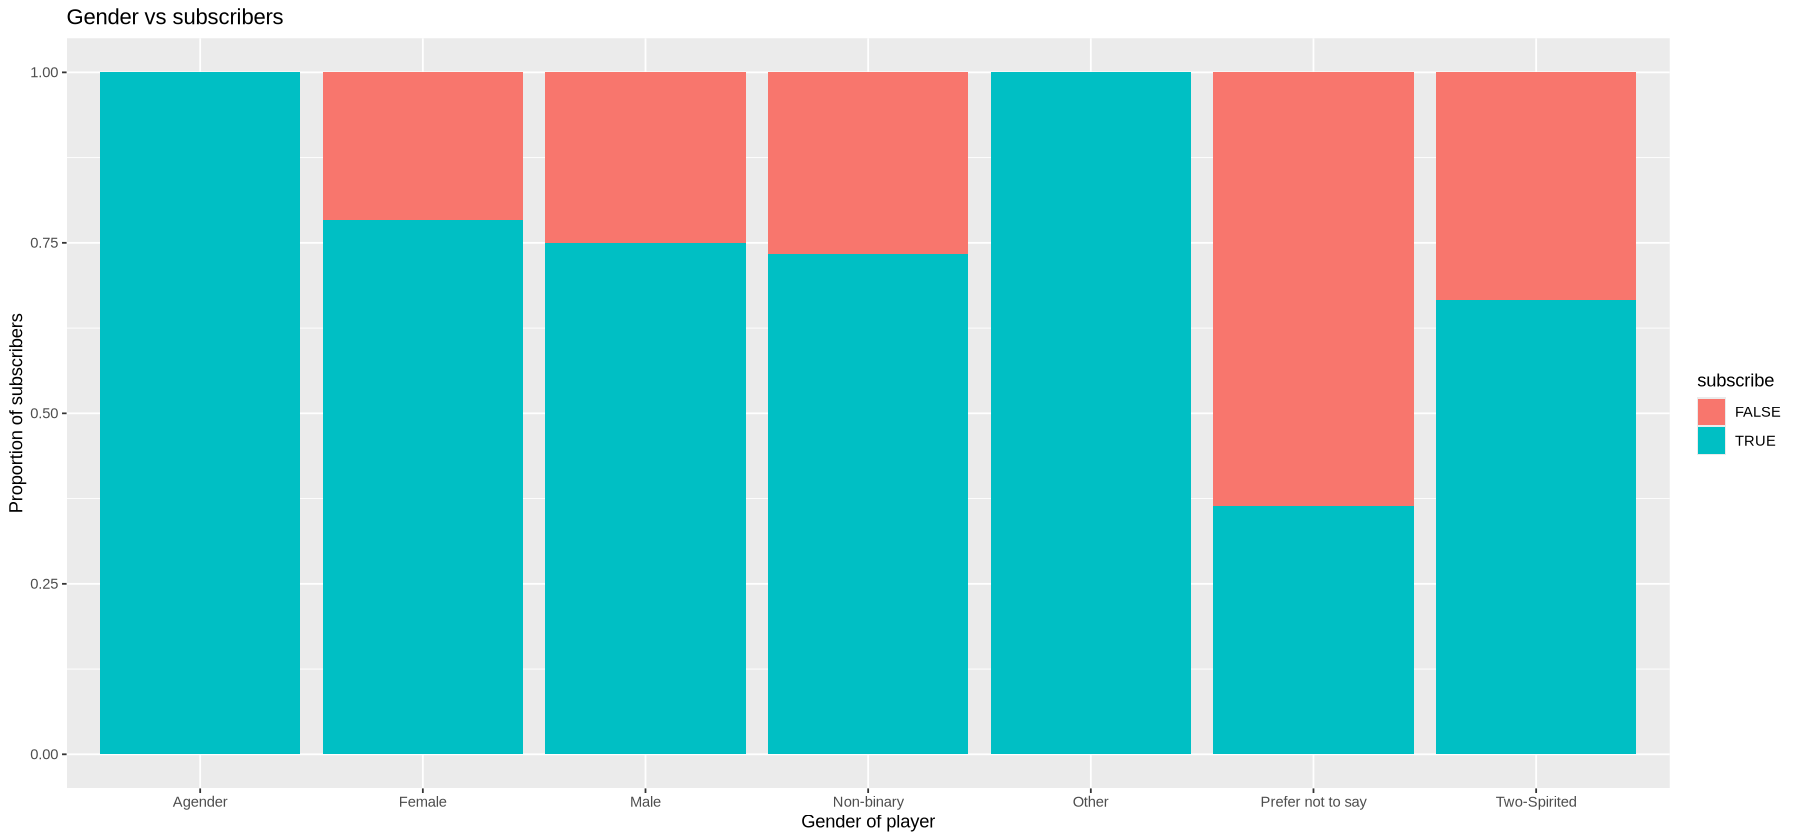

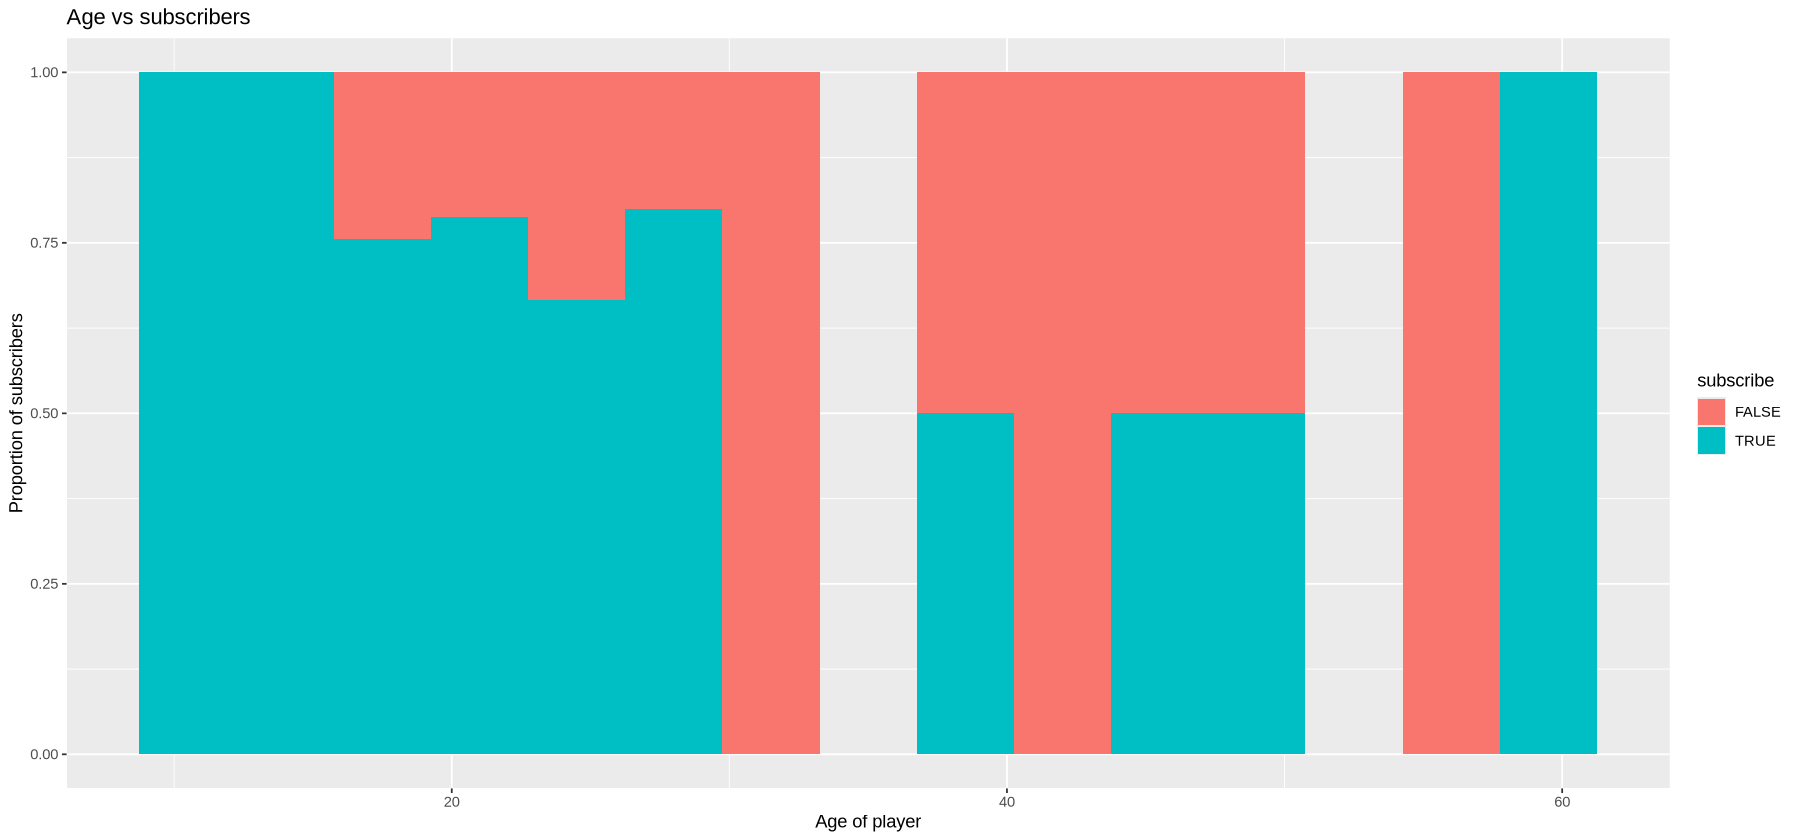

In [29]:
options(repr.plot.width = 15, repr.plot.height = 7)
plot_1 <- ggplot(player_data, aes(x = experience, fill = subscribe)) +
    geom_bar(position = "fill") +
    labs(x = "Experience of player", y = "Proportion of subscribers", title = "Experience vs subscribers")
plot_2 <- ggplot(player_data, aes(x = gender, fill = subscribe)) +
    geom_bar(position = "fill") +
    labs(x = "Gender of player", y = "Proportion of subscribers", title = "Gender vs subscribers")
plot_3 <- ggplot(player_data, aes(x = Age, fill = subscribe)) +
    geom_histogram(bins = 15, position = "fill") +
    labs(x = "Age of player", y = "Proportion of subscribers", title = "Age vs subscribers")
plot_1
plot_2
plot_3
                 

These visualizations show that only the age of players may contribute to whether they subscribed or not. plot_3 shows that younger players are more likely to subscribe.

(4) Methods and Plan

I chose to use the knn classification method. I believe this is suitable for this problem because it works well to predict variables with classes including subscribe (true or false).
Assumptions that are required are that players with similar features will more likely have the same subscription status. Another assumption is that the dataset represents the overall population well.
A potential limitation/weakness is that a effective "k" must be chosen to avoid overfitting or underfitting.
The optimal "k" will be selected through cross validation, and the preformance of the model will be measured through accuracy, precision, recall, and F1-score.
I will split the data 0.8, 80% training and 20% testing data. I will fold 5 times with vfold to use cross validation.